<a href="https://colab.research.google.com/github/oonya/image-processing/blob/master/MTG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MTGで話したCLANEなどを試すファイル

#### 試した内容
- ホワイトバランスを整えた後の２値化はSaturatonで大津の２値化をするとうまいこといった
  - モルフォロジー変換を(20, 20)などで行っている
  - ホワイトバランスを整えると全体的に彩度が上がるので、今のところこれでいけそう。他の撮り方とかするとダメかもだけど、それは機械学習に目途がついてからにする

<Figure size 432x288 with 0 Axes>

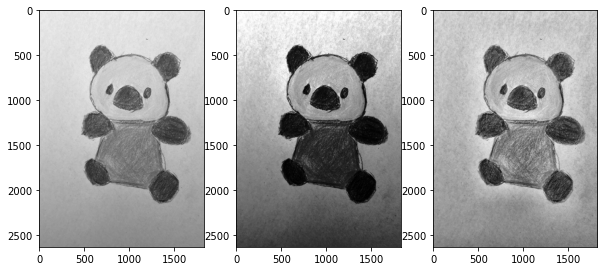

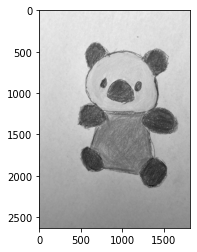

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('drive/My Drive/latest1.JPG', 0)
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.gray()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img1)

equ = cv2.equalizeHist(img1)

ax = fig.add_subplot(1, 3, 2)
ax.imshow(equ)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img1)

ax = fig.add_subplot(1, 3, 3)
ax.imshow(cl1)

# Binaryzation




fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.imshow(img1)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(img):

  # gamma = 3.1 # gammaはパラメータで、1.0より大きいと明るく、小さいと暗くなる
  gamma = 2.2

  lookUpTable = np.zeros((256, 1), dtype = 'uint8')

  for i in range(256):
    lookUpTable[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)

  img_gamma = cv2.LUT(img, lookUpTable)

  return img_gamma

img1 = cv2.imread('drive/My Drive/latest1.JPG')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img1に対し、ガンマ補正
# img1 = gamma_correction(img1)

lab = cv2.cvtColor(img1, cv2.COLOR_RGB2LAB)
l_img = lab[:, :, 0]

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(l_img)

plt.gray()

fig = plt.figure()
ax = plt.subplot(1, 2, 1)
ax.imshow(lab)

ax = plt.subplot(1, 2, 2)
ax.imshow(cl1)

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
lab[:, :, 0] = equ
print(lab[:, :, 0].shape, cl1.shape)
print(lab.shape)
lab = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
print(lab.shape)

ax.imshow(lab)

TypeError: ignored

In [ ]:
a = [
     [[1, 2, 3], [1, 2, 3]],
     [[1, 2, 3], [1, 2, 3]]
     ]
a =  np.array(a)

a[:, :, 2] = np.array([[4, 4], [4, 4]])

print(a)

contours 6
21.0


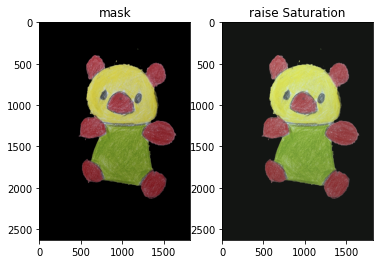

In [ ]:
# white blanceやマスクをとる順番を変える
# white blace → masking → raise saturation

import cv2
import numpy as np
import matplotlib.pyplot as plt

def white_balance(img):
    result = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv2.cvtColor(result, cv2.COLOR_LAB2RGB)
    return result



def my_bin(img1):
  img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
  img1 = white_balance(img1)
  img1_g = cv2.cvtColor(img1, cv2.COLOR_RGB2HSV)[:, :, 1]
  ret, th = cv2.threshold(img1_g, 0, 255, cv2.THRESH_OTSU)
  kernel = np.ones((20, 20), np.uint8)
  mor = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
  return mor

img = cv2.imread('drive/My Drive/latest1.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = white_balance(img)

mor = my_bin(img)

contours, hierarchy = cv2.findContours(mor, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("contours",len(contours))

mask = np.zeros_like(img)
cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
mask = mask & img



def raiseSaturation(img):
    r = img[:,:,0].astype(np.float32)
    g = img[:,:,1].astype(np.float32)
    b = img[:,:,2].astype(np.float32)

    _max = np.max([255 - np.max(r),255 - np.max(g),255 - np.max(b)])
    print(_max)

    r = img[:, :, 0] + _max
    g = img[:, :, 1] + _max
    b = img[:, :, 2] + _max

    result = np.zeros(img.shape,dtype=float)
    result[:,:,0] =  r / np.max(r)
    result[:,:,0] *= 255
    result[:,:,1] =  g / np.max(g)
    result[:,:,1] *= 255
    result[:,:,2] =  b / np.max(b)
    result[:,:,2] *= 255
    return result.astype(np.uint8)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.set_title('mask')
ax.imshow(mask)

ax = fig.add_subplot(1, 2, 2)
ax.set_title('raise Saturation')
ax.imshow(raiseSaturation(mask))



[76 67  7]
(468859, 3)
[178 165  45]
(417837, 3)
[72 90 14]
(415141, 3)
(468859, 3)


<Figure size 432x288 with 0 Axes>

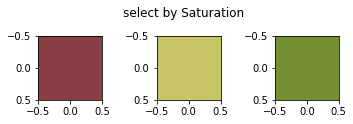

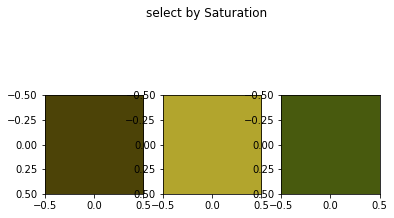

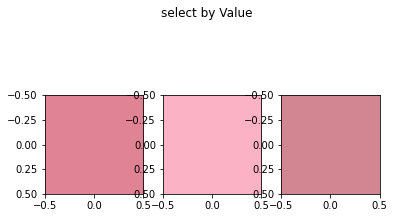

In [ ]:
# new Kmeans code
# 平均ではなく、彩度が最大のものをとる

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# img1 = cv2.imread('drive/My Drive/latest1.JPG')
# img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# img1 = white_balance(img1)
# img1 = raiseSaturation(img1)
# mask1 = masking(img1)

mask1 = mask
# plt.imshow(mask1)

# Kmeans start
data = np.reshape(mask1, (mask1.shape[0]*mask1.shape[1], mask1.shape[2])) # クラスタリングのために2次元に直す

data = data[(data != 0).all(axis=1)]
lab_data = cv2.cvtColor(np.uint8([data]), cv2.COLOR_RGB2LAB)
data = lab_data[0]

n_clusters=3 # クラスタ数(何色に減色するか)
model = KMeans(n_clusters=n_clusters, random_state=10).fit(data)
labels = model.labels_

data = cv2.cvtColor(np.uint8([data]), cv2.COLOR_LAB2RGB)
data = data[0]

plt.figure(2)

fig = plt.figure()
fig.suptitle("select by Saturation")

fig1 = plt.figure()
fig1.suptitle("select by Saturation")

fig2 = plt.figure()
fig2.suptitle("select by Value")





# maxSaturationIndex(data[labels==0, :])

for l in range(0,n_clusters):
    mean = np.mean(data[labels==l,:], axis=0)
    # data[labels==l,:]=mean
    # print("mean", mean)
    ax = fig.add_subplot(3, 3, l+1)
    ax.imshow(np.uint8([[mean]]))

    clusters = data[labels==l, :]
    print(clusters[maxSaturationIndex(clusters)])

    ax = fig1.add_subplot(1, 3, l+1)
    ax.imshow(np.uint8([[clusters[maxSaturationIndex(clusters)]]]))

    ax = fig2.add_subplot(1, 3, l+1)
    ax.imshow(np.uint8([[clusters[maxValueIndex(clusters)]]]))
    print(clusters.shape)

print(data[labels==0, :].shape)

# Saturationでとってからガンマ補正など

メジアン
代表地




In [ ]:
# functions
# MTG'code


def maxSaturationIndex(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 1]
  # print(s[0].shape)
  return np.argmax(s[0])

def maxValueIndex(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 2]
  # print(s[0].shape)
  return np.argmax(s[0])

def maxSaturationPixelAverage(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 1][0] # shape = (417885, )

  # sort_index = np.argsort(-s)# argsort(s)で昇順、argsort(-s)で降順
  sort_index = np.argsort(s)[::-1] #こちらでもできるらしい（上は怪しい）
  
  high_saturation_pixels = []
  for i in range(0, 10):
    high_saturation_pixels.append(clusters[sort_index[i]])

  
  # print(high_saturation_pixels)

maxSaturationPixelAverage(data[labels==0, :])

[ 92 103 105 ...  64  63  67]
[ 11337  13816  22798 ... 408405 408404 121843]
[90 89 88 87 80 71 67 64 63]
[223 223 224 224 224 224 224 224 224]
[[60 72  9]
 [60 72  9]
 [58 75  9]
 [60 75  9]
 [60 75  9]
 [61 75  9]
 [58 75  9]
 [58 75  9]
 [58 75  9]]
[124 124 124]
0
[120 120 120]
0
[125 125 125]
0
[125 125 125]
0
[123 123 123]
0
[129 129 129]
0
[132 132 132]
0
[124 124 124]
0
[122 122 122]
0
[126 126 126]
0


In [ ]:
# functions
# Sample SAMPLE


def maxSaturationIndex(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 1]
  # print(s[0].shape)
  return np.argmax(s[0])

def maxValueIndex(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 2]
  # print(s[0].shape)
  return np.argmax(s[0])

def maxSaturationPixelAverage(clusters):
  hsv_c = cv2.cvtColor(np.uint8([clusters]), cv2.COLOR_RGB2HSV)
  s = hsv_c[:, :, 1][0] # shape = (417885, )
  # sort_index = np.argsort(-s)# argsort(s)で昇順、argsort(-s)で降順
  sort_index = np.argsort(s)[::-1] #こちらでもできるらしい（上は怪しい）
  
  for i in range(0, 10):
    # high_saturation_pixels.append(clusters[sort_index[i]])
    print(clusters[sort_index[i]])
    tmp = np.uint8([[clusters[sort_index[i]]]])
    tmp = cv2.cvtColor(tmp, cv2.COLOR_RGB2HSV)[0, 0, 1]
    print(tmp)
    print(s[sort_index[i]])

  
  # print(high_saturation_pixels)

maxSaturationPixelAverage(data[labels==0, :])

[64 74  9]
224
224
[58 75  9]
224
224
[58 75  9]
224
224
[58 75  9]
224
224
[61 75  9]
224
224
[60 75  9]
224
224
[60 75  9]
224
224
[58 75  9]
224
224
[60 72  9]
223
223
[60 72  9]
223
223


In [ ]:
# cls = np.uint8([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
# hs = np.uint8([cls])
# s_c = np.uint8(hs[:, :, 1])[0]
# sort_i = np.argsort(s_c)

# for i in sort_i:
#   print(cls[i])

# print(np.unique(labels, axis=0).shape)
print(data[labels==0, :].shape)
print(np.unique(data[labels==0, :], axis=0).shape)

(417885, 3)
(20365, 3)
